In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
swa_zips = [98101, 98102, 98103, 98104, 98105, 98106, 
            98107, 98108, 98109, 98112, 98115, 98116, 
            98117, 98118, 98119, 98121, 98122, 98125, 
            98126, 98133, 98134, 98136, 98144, 98146, 
            98154, 98164, 98174, 98177, 98178, 98195, 
            98199]

In [3]:
path_tax_2011 = '../../Appendix_A_Resources/Tax_Data/IRS_Zip_2011.csv'

tax_df_2011 = pd.DataFrame(pd.read_csv(path_tax_2011))

tax_df_2011 = tax_df_2011.rename(columns={'ZIPCODE':'Zip',
                                'agi_stub':'Tax Bracket',
                                'N1':'Number of Returns (2011)',
                                'N2':'Number of Exemptions (2011)',
                                'A00100':'Adjusted Gross Income (AGI) (2011)'})

tax_df_2011 = tax_df_2011.loc[tax_df_2011['STATE']=='WA']

path_tax_2017 = '../../Appendix_A_Resources/Tax_Data/IRS_Zip_2017.csv'

tax_df_2017 = pd.DataFrame(pd.read_csv(path_tax_2017))

tax_df_2017 = tax_df_2017.rename(columns={'zipcode':'Zip',
                                'agi_stub':'Tax Bracket',
                                'N1':'Number of Returns (2017)',
                                'N2':'Number of Exemptions (2017)',
                                'A00100':'Adjusted Gross Income (AGI) (2017)'})

tax_df_2017 = tax_df_2017.loc[tax_df_2017['STATE']=='WA']

tax_df_2017

,STATEFIPS,STATE,Zip,Tax Bracket,Number of Returns (2017),mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
71168,53,WA,0,1,973730.0,726850.0,110780.0,123850.0,833450.0,61800.0,...,20.0,180.0,96840.0,84694.0,805000.0,1409932.0,799160.0,1394809.0,6490.0,9917.0
71169,53,WA,0,2,836560.0,486020.0,189820.0,145800.0,741270.0,45500.0,...,0.0,0.0,129520.0,209317.0,700640.0,1693136.0,693060.0,1670311.0,10350.0,20768.0
71170,53,WA,0,3,529490.0,243350.0,219110.0,57990.0,466990.0,29520.0,...,20.0,24.0,125830.0,297296.0,402170.0,1076352.0,393220.0,1045720.0,12180.0,31846.0
71171,53,WA,0,4,364060.0,111180.0,222600.0,25080.0,322460.0,19660.0,...,20.0,7.0,98450.0,294592.0,263720.0,850913.0,255070.0,812591.0,10040.0,33996.0
71172,53,WA,0,5,586200.0,107070.0,454560.0,20930.0,524490.0,34040.0,...,700.0,816.0,217190.0,1043118.0,367280.0,1572417.0,346520.0,1417850.0,26810.0,161736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74139,53,WA,99999,2,15570.0,9030.0,3380.0,2860.0,13360.0,940.0,...,0.0,0.0,2740.0,4768.0,12520.0,30188.0,12310.0,29487.0,160.0,183.0
74140,53,WA,99999,3,9610.0,4740.0,3610.0,1100.0,8160.0,630.0,...,0.0,0.0,2470.0,6258.0,6920.0,18388.0,6680.0,17433.0,190.0,330.0
74141,53,WA,99999,4,6220.0,2250.0,3530.0,400.0,5340.0,440.0,...,0.0,0.0,1800.0,5982.0,4240.0,13521.0,4020.0,12633.0,180.0,413.0
74142,53,WA,99999,5,8700.0,1910.0,6400.0,340.0,7510.0,700.0,...,30.0,31.0,3480.0,19495.0,5040.0,24077.0,4510.0,19838.0,560.0,2807.0


In [4]:
tax_bracks_2011 = {}
agi_2011 = {}

for index, row in tax_df_2011.iterrows():
    
    if row['Zip'] in swa_zips:
        
        if row['Zip'] not in tax_bracks_2011:

            tax_bracks_2011[row['Zip']] = {}
            agi_2011[row['Zip']] = {}

            if row['Tax Bracket'] == 1.0:
                tax_bracks_2011[row['Zip']]['<$25,000'] = (row['Number of Returns (2011)'])
                agi_2011[row['Zip']]['<$25,000'] = row['Adjusted Gross Income (AGI) (2011)']


        else:


            if row['Tax Bracket'] == 2.0:
                tax_bracks_2011[row['Zip']]['$50,000'] = (row['Number of Returns (2011)'])
                agi_2011[row['Zip']]['$50,000'] = row['Adjusted Gross Income (AGI) (2011)']
            elif row['Tax Bracket'] == 3.0:
                tax_bracks_2011[row['Zip']]['$75,000'] = (row['Number of Returns (2011)'])
                agi_2011[row['Zip']]['$75,000'] = row['Adjusted Gross Income (AGI) (2011)']
            elif row['Tax Bracket'] == 4.0:
                tax_bracks_2011[row['Zip']]['$100,000'] = (row['Number of Returns (2011)'])
                agi_2011[row['Zip']]['$100,000'] = row['Adjusted Gross Income (AGI) (2011)']
            elif row['Tax Bracket'] == 5.0:
                tax_bracks_2011[row['Zip']]['$200,000'] = (row['Number of Returns (2011)'])
                agi_2011[row['Zip']]['$200,000'] = row['Adjusted Gross Income (AGI) (2011)']
            elif row['Tax Bracket'] == 6.0:
                tax_bracks_2011[row['Zip']]['$200,000<'] = (row['Number of Returns (2011)'])
                agi_2011[row['Zip']]['$200,000<'] = row['Adjusted Gross Income (AGI) (2011)'] 

In [5]:
tax_bracks_2017 = {}
agi_2017 = {}

for index, row in tax_df_2017.iterrows():
    
    if row['Zip'] in swa_zips:


        if row['Zip'] not in tax_bracks_2017:

            tax_bracks_2017[row['Zip']] = {}
            agi_2017[row['Zip']] = {}

            if row['Tax Bracket'] == 1.0:
                tax_bracks_2017[row['Zip']]['<$25,000'] = (row['Number of Returns (2017)'])
                agi_2017[row['Zip']]['<$25,000'] = row['Adjusted Gross Income (AGI) (2017)']

        else:


            if row['Tax Bracket'] == 2.0:
                tax_bracks_2017[row['Zip']]['$50,000'] = (row['Number of Returns (2017)'])
                agi_2017[row['Zip']]['$50,000'] = row['Adjusted Gross Income (AGI) (2017)']
            elif row['Tax Bracket'] == 3.0:
                tax_bracks_2017[row['Zip']]['$75,000'] = (row['Number of Returns (2017)'])
                agi_2017[row['Zip']]['$75,000'] = row['Adjusted Gross Income (AGI) (2017)']
            elif row['Tax Bracket'] == 4.0:
                tax_bracks_2017[row['Zip']]['$100,000'] = (row['Number of Returns (2017)'])
                agi_2017[row['Zip']]['$100,000'] = row['Adjusted Gross Income (AGI) (2017)']
            elif row['Tax Bracket'] == 5.0:
                tax_bracks_2017[row['Zip']]['$200,000'] = (row['Number of Returns (2017)'])
                agi_2017[row['Zip']]['$200,000'] = row['Adjusted Gross Income (AGI) (2017)']
            elif row['Tax Bracket'] == 6.0:
                tax_bracks_2017[row['Zip']]['$200,000<'] = (row['Number of Returns (2017)'])
                agi_2017[row['Zip']]['$200,000<'] = row['Adjusted Gross Income (AGI) (2017)'] 

In [6]:
brackets = ['<$25,000','$50,000','$75,000','$100,000','$200,000','$200,000<']

swa_tax_2011 = pd.DataFrame(data=tax_bracks_2011)
swa_tax_2011['Total Returns and Exemptions'] = swa_tax_2011.sum(axis=1)
swa_tax_2011 = swa_tax_2011.T
swa_tax_2011 = swa_tax_2011[brackets].reset_index()
swa_tax_2011 = swa_tax_2011.rename(columns={'index':'Zip'}).set_index('Zip')

swa_tax_2017 = pd.DataFrame(data=tax_bracks_2017)
swa_tax_2017['Total Returns and Exemptions'] = swa_tax_2017.sum(axis=1)
swa_tax_2017 = swa_tax_2017.T
swa_tax_2017 = swa_tax_2017[brackets].reset_index()
swa_tax_2017 = swa_tax_2017.rename(columns={'index':'Zip'}).set_index('Zip')

swa_agi_2011 = pd.DataFrame(data=agi_2011)
swa_agi_2011['Total AGI'] = swa_agi_2011.sum(axis=1)
swa_agi_2011 = swa_agi_2011.T
swa_agi_2011 = swa_agi_2011[brackets].reset_index()
swa_agi_2011 = swa_agi_2011.rename(columns={'index':'Zip'}).set_index('Zip')

swa_agi_2017 = pd.DataFrame(data=agi_2017)
swa_agi_2017['Total AGI'] = swa_agi_2017.sum(axis=1)
swa_agi_2017 = swa_agi_2017.T
swa_agi_2017 = swa_agi_2017[brackets].reset_index()
swa_agi_2017 = swa_agi_2017.rename(columns={'index':'Zip'}).set_index('Zip')

swa_agi_2017 = swa_agi_2017.drop_duplicates()

swa_agi_2017.head()

,"<$25,000","$50,000","$75,000","$100,000","$200,000","$200,000<"
Zip,,,,,,
98101,16358.0,59194.0,76397.0,84029.0,343309.0,1309057.0
98102,34827.0,141939.0,193794.0,161307.0,455001.0,1139564.0
98103,66542.0,239933.0,309473.0,277663.0,850333.0,1730579.0
98104,23154.0,64816.0,57562.0,51356.0,144173.0,521983.0
98105,68641.0,136482.0,113068.0,87935.0,334752.0,1790557.0


Total 2011 returns: 372014.0
Total 2017 returns: 419470.0


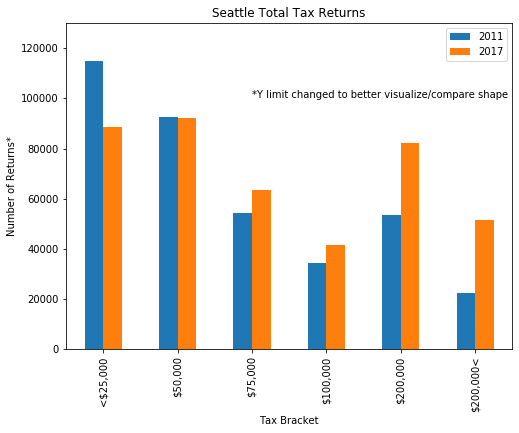

In [7]:
total_tax = pd.DataFrame({'2011':swa_tax_2011.loc['Total Returns and Exemptions'],
                          '2017':swa_tax_2017.loc['Total Returns and Exemptions']})
total_tax.plot(kind='bar',figsize=(8,6))
title = 'Seattle Total Tax Returns'
plt.title(title)
plt.xlabel('Tax Bracket')
plt.ylabel('Number of Returns*')
plt.ylim(0,130000)
message = '*Y limit changed to better visualize/compare shape'
plt.annotate(message,xy=(2,100000))
print(f'Total 2011 returns: {round(total_tax["2011"].sum(),0)}')
print(f'Total 2017 returns: {total_tax["2017"].sum()}')
plt.savefig(f'../../Appendix_B_Output_Data/{title}.png',dpi=100,bbox_inches='tight')

Total 2011 adjusted gross income: 30281071.0
Total 2017 adjusted gross income: 49383601.0


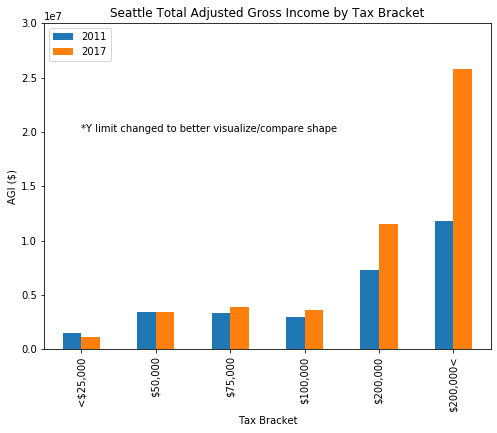

In [9]:
total_agi = pd.DataFrame({'2011':swa_agi_2011.loc['Total AGI'],'2017':swa_agi_2017.loc['Total AGI']})
total_agi.plot(kind='bar',figsize=(8,6))
title = 'Seattle Total Adjusted Gross Income by Tax Bracket'
plt.title(title)
plt.ylabel('AGI ($)')
plt.xlabel('Tax Bracket')
plt.ylim(0,30000000)
plt.legend(loc='upper left')
message = '*Y limit changed to better visualize/compare shape'
plt.annotate(message,xy=(0,20000000))
print(f'Total 2011 adjusted gross income: {round(total_agi["2011"].sum(),0)}')
print(f'Total 2017 adjusted gross income: {total_agi["2017"].sum()}')
plt.savefig(f'../../Appendix_B_Output_Data/Seattle_Total_AGI.png',dpi=100,bbox_inches='tight')